In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/spotify_tracks_cleaned.csv") 
df.head() 

,id,name,album,artists,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,3.502217,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],True,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,3.436667,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.981550,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],True,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,3.560667,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,3.426667,1999,1999-11-02


In [3]:
df.shape

(1201225, 17)

In [4]:
# Section 2: Mood-based clustering with KMeans 

# Select audio features 
audio_features = [
    'danceability', 
    'energy', 
    'loudness', 
    'speechiness', 
    'acousticness', 
    'instrumentalness', 
    'liveness', 
    'valence', 
    'tempo' 
] 

In [6]:
X = df[audio_features] 
X_scaled = StandardScaler().fit_transform(X) 

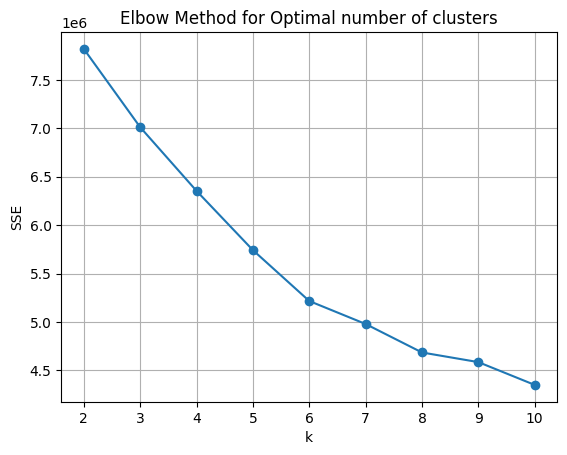

In [7]:
# Elbow method to find optimal k 
sse = [] 

for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=27).fit(X_scaled) 
    sse.append(kmeans.inertia_) 

# Visualize 
plt.plot(range(2,11), sse, marker='o') 
plt.title("Elbow Method for Optimal number of clusters") 
plt.xlabel("k") 
plt.ylabel("SSE") 
plt.grid(True) 
plt.show() 

In [9]:
# Applying KMeans with k=6 
kmeans = KMeans(n_clusters=6, random_state=27) 
df['cluster'] = kmeans.fit_predict(X_scaled) 

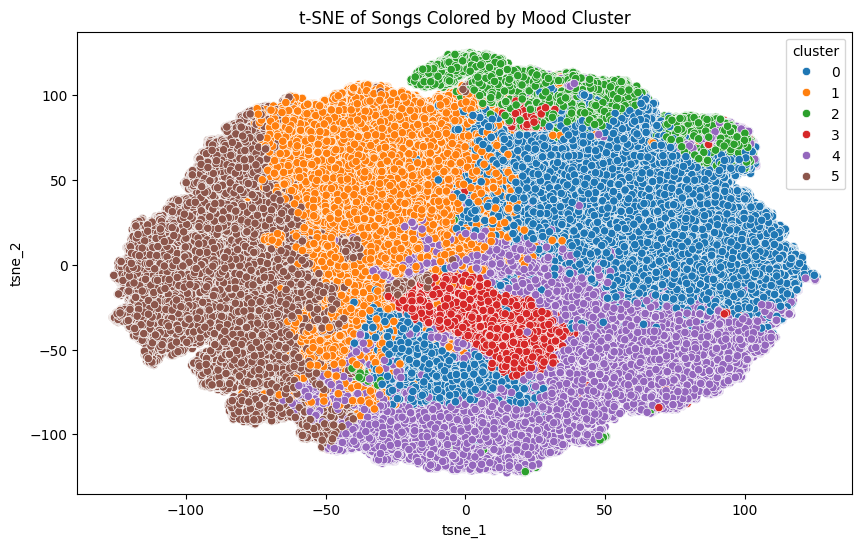

In [10]:
# t-SNE for 2D visualization 
tsne = TSNE(n_components=2, perplexity=30, random_state=27) 
tsne_proj = tsne.fit_transform(X_scaled) 

df['tsne_1'] = tsne_proj[:, 0] 
df['tsne_2'] = tsne_proj[:, 1] 

# Plot 
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10')
plt.title("t-SNE of Songs Colored by Mood Cluster")
plt.show()

In [11]:
df.to_csv("../data/spotify_tracks_with_clusters.csv", index=False)

In [12]:
df.head() 

,id,name,album,artists,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,year,release_date,cluster,tsne_1,tsne_2
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,3.502217,1999,1999-11-02,4,66.645859,-36.375896
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],True,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,3.436667,1999,1999-11-02,0,48.224667,72.048698
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.981550,1999,1999-11-02,2,92.581078,78.466362
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],True,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,3.560667,1999,1999-11-02,0,41.344658,99.569511
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],False,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,3.426667,1999,1999-11-02,4,77.623955,-31.373718
